# Intro to Penn World Tables

In the lecture, we saw some scatter plots produced using data from Penn World Tables. In this notebook, we replicate Figures 24, 25, and 26 of Chad Jones' [Facts of Economic Growth](https://web.stanford.edu/~chadj/facts.pdf).

The source for those figures is Penn World Tables 8.0.

* Let's start by going to [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/) and see what it is all about.
* First thing to notice: the latest dataset is 10.0
* We will conduct our analysis with this latest dataset rather than the exact vintage that Jones used (but it would be interesting to replicate his results exactly by using the same dataset).
* There is a link to an Excel file. Click on it and open up the Excel file.
* After perusing the dataset, we are ready to do some work in Python

## Loading modules

First, we load three Python modules (informally: collections of functions and capabilities)

In [1]:
import numpy as np #numerical stuff (i.e., taking logarithms)
import pandas as pd #good for handling datasets
import matplotlib.pyplot as plt #good for plotting
plt.rcParams['font.size'] = 9 #set font size a bit smaller

## Loading the dataset and constructing variables

Then we load the dataset from the website.

In [2]:
# Download data from Penn World Table
url = "https://www.rug.nl/ggdc/docs/pwt100.xlsx"
data_in = pd.read_excel(url, sheet_name='Data')
data = data_in.copy()

How does the dataset "look"?

In [3]:
data

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.422764,1.533909
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.416510,1.491724
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.415592,1.514525
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.425143,1.590120


Which variables are in the dataset?

In [4]:
data.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

What do these variables mean? Let's go to the Excel file and investigate.

We are interested in constructing "real GDP per capita". How should we do that? Hmm, it seems like we have a couple of choices. Sigh. Let's go to the documentation...

Furthermore, what does Jones do? He is not necessarily right but it is always nice to compare, and since we are trying to replicate his figures... Let's go to his website and see if we can find some further details on what exactly he did...

We are in luck, he posted a replication package!

### Constructing real GDP per capita for the years 1960 an 2015

In [5]:
data['rgdpc'] = data['rgdpo']/data['pop']

data1960 = data[data['year']==1960].copy()
data2015 = data[data['year']==2015].copy()

In addition, we also want to show real GDP per capita relative to the US:

In [6]:
data1960.index = data1960.country
data1960['rgdpc1960'] = data1960['rgdpc']
data1960['rgdpc1960_rel_us'] = data1960['rgdpc']/data1960['rgdpc'].loc['United States']
data1960['pop1960'] = data1960['pop']

data2015.index = data2015.country
data2015['rgdpc2015'] = data2015['rgdpc']
data2015['rgdpc2015_rel_us'] = data2015['rgdpc']/data2015['rgdpc'].loc['United States']


Finally, we put 1960 and 2015 together in one dataset, and we compute the growth rate in the period.

We also introduce a restriction to only show countries with more than 1 million inhabitants in 1960 (arbitrary).

In [7]:
data_for_plot = pd.concat([data1960[['rgdpc1960','rgdpc1960_rel_us', 'pop1960']], 
                       data2015[['rgdpc2015','rgdpc2015_rel_us']]], 
                       axis = 1)
data_for_plot['rgdpc_growth'] = (np.log(data_for_plot['rgdpc2015'])-np.log(data_for_plot['rgdpc1960']))/(2015-1960)

restriction = data_for_plot['pop1960']> 1.0

## Replicating Figure 24

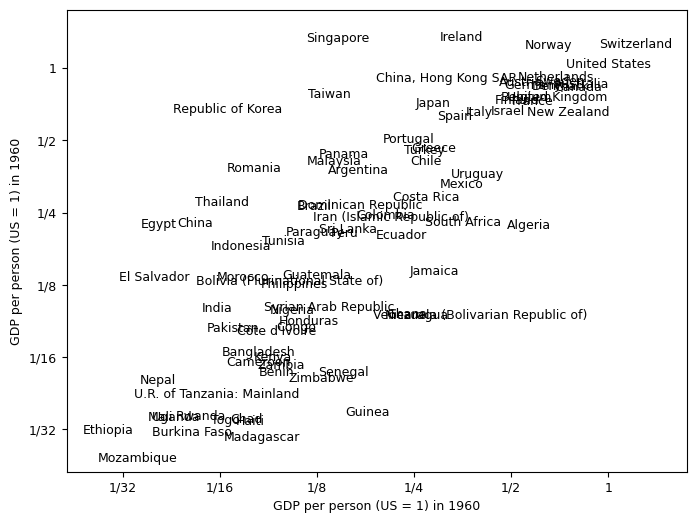

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

for i in range(len(data_for_plot[restriction])):
    ax.annotate(data_for_plot[restriction].index[i], 
             (data_for_plot[restriction]['rgdpc1960_rel_us'][i],data_for_plot[restriction]['rgdpc2015_rel_us'][i]),
             ha='center')
ax.set_xlabel('GDP per person (US = 1) in 1960')
ax.set_ylabel('GDP per person (US = 1) in 1960')


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([1/48, 1.75])
ax.set_ylim([1/48, 1.75])
ax.set_xticks([1/32, 1/16, 1/8, 1/4, 1/2, 1], ["1/32", "1/16", "1/8", "1/4", "1/2", "1"])
ax.set_yticks([1/32, 1/16, 1/8, 1/4, 1/2, 1], ["1/32", "1/16", "1/8", "1/4", "1/2", "1"])
plt.minorticks_off()

Does it look identical to Jones' figure? Look at Norway!

## Replicating Figure 26

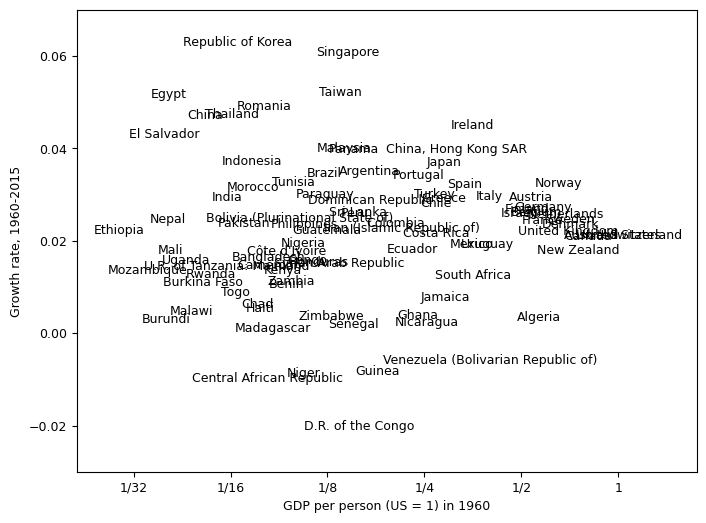

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

for i in range(len(data_for_plot[restriction])):
    ax.annotate(data_for_plot[restriction].index[i], 
             (data_for_plot[restriction]['rgdpc1960_rel_us'][i],data_for_plot[restriction]['rgdpc_growth'][i]),
             ha='center')
ax.set_xlabel('GDP per person (US = 1) in 1960')
ax.set_ylabel('Growth rate, 1960-2015')


ax.set_xscale('log')
ax.set_xlim([1/48, 1.75])
ax.set_ylim([-0.03, 0.07])
ax.set_xticks([1/32, 1/16, 1/8, 1/4, 1/2, 1], ["1/32", "1/16", "1/8", "1/4", "1/2", "1"])
#ax.set_yticks([1/32, 1/16, 1/8, 1/4, 1/2, 1], ["1/32", "1/16", "1/8", "1/4", "1/2", "1"])
plt.minorticks_off()

## Replicating Figure 25

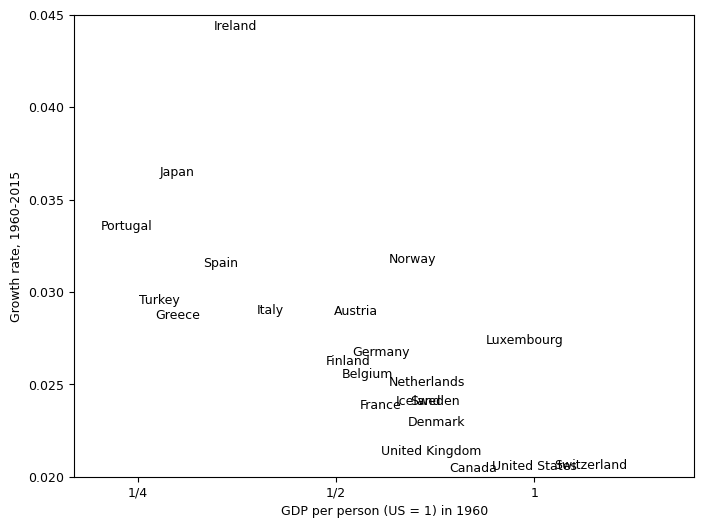

In [10]:
oecd = ['Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
        'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Japan',
        'Luxembourg', 'Netherlands', 'Norway', 'Portugal', 'Spain', 
        'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States'] 
#https://www.oecd.org/about/document/ratification-oecd-convention.htm OECD countries by 1970

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

for i in range(len(data_for_plot.loc[oecd])):
    ax.annotate(data_for_plot.loc[oecd].index[i], 
             (data_for_plot.loc[oecd]['rgdpc1960_rel_us'][i],data_for_plot.loc[oecd]['rgdpc_growth'][i]),
             ha='center')
ax.set_xlabel('GDP per person (US = 1) in 1960')
ax.set_ylabel('Growth rate, 1960-2015')


ax.set_xscale('log')
ax.set_xlim([1/5, 1.75])
ax.set_ylim([0.02, 0.045])
ax.set_xticks([1/4, 1/2, 1], ["1/4", "1/2", "1"])
plt.minorticks_off()